In [1]:
import math
import matplotlib

In [2]:
def calculate_LJ(r_ij):
    """
    The Lennard Jones interaction energy between two particles.
    
    Computes the pairwise Lennard Jones interaction energy based on the separation distance in reduced units.
    
    Parameters
    ----------
    r_ij : float
        The distance between the particles in reduced units.
    """
    
    r6_term = math.pow(1/r_ij, 6)
    r12_term = math.pow(1/r_ij, 12)
    
    pairwise_energy = 4 * (r12_term - r6_term)
    
    return pairwise_energy

In [3]:
def calculate_distance(coord1, coord2):
    """
    Calculate the distance between two 3D coordinates.
   
    Parameters
    ----------
    coord1, coord2: list
        The atomic coordinates
    
    Returns
    -------
    distance: float
        The distance between the two points.
    """
    distance = 0
        
    
    for i in range(3):
        distance += math.pow(coord2[i] - coord1[i], 2)
    
    
    return math.sqrt(distance)

In [4]:
# Calculates total energy with cuttoffs
def calculate_total_pair_energy(coordinates, cutoff):
    total_energy = 0
    num_atoms = len(coordinates)
    count = 0

    for i in range(num_atoms):
        for j in range(i+1, num_atoms):
            # Calculate the distance between the particles - exercise.
            dist_ij = calculate_distance(coordinates[i], coordinates[j])

            if dist_ij < cutoff:
                # Calculate the pairwise LJ energy
                LJ_ij = calculate_LJ(dist_ij)

                # Add to total energy.
                total_energy += LJ_ij
                count += 1
                
    print(count)
    return total_energy

In [5]:
## Calculate total energy function here
def calculate_total_energy(coordinates):   
    total_energy = 0
    num_atoms = len(coordinates)
    count = 0
    
    for i in range(num_atoms):
        for j in range(i+1, num_atoms):
            dist_ij = calculate_distance(coordinates[i], coordinates[j])
            pairwise_energy = calculate_LJ(dist_ij)
            
            total_energy += pairwise_energy
            count += 1
    print(count)
    return total_energy

In [6]:
# Provided function

def read_xyz(filepath):
    """
    Reads coordinates from an xyz file.
    
    Parameters
    ----------
    filepath : str
       The path to the xyz file to be processed.
       
    Returns
    -------
    atomic_coordinates : list
        A two dimensional list containing atomic coordinates
    """
    
    with open(filepath) as f:
        box_length = float(f.readline().split()[0])
        num_atoms = float(f.readline())
        coordinates = f.readlines()
    
    atomic_coordinates = []
    
    for atom in coordinates:
        split_atoms = atom.split()
        
        float_coords = []
        
        # We split this way to get rid of the atom label.
        for coord in split_atoms[1:]:
            float_coords.append(float(coord))
            
        atomic_coordinates.append(float_coords)
        
    
    return atomic_coordinates, box_length


In [7]:
## Read in first sample configuration file here
import os
config1_file = os.path.join("../../lj_sample_configurations", "lj_sample_config_periodic1.txt")

sample_coords, box_length = read_xyz(config1_file)

print(box_length)
print(len (sample_coords))

10.0
800


# Visualization

In [8]:
import matplotlib.pyplot as plt

# special jupyter notebook command to make plots interactive
%matplotlib notebook

<IPython.core.display.Javascript object>


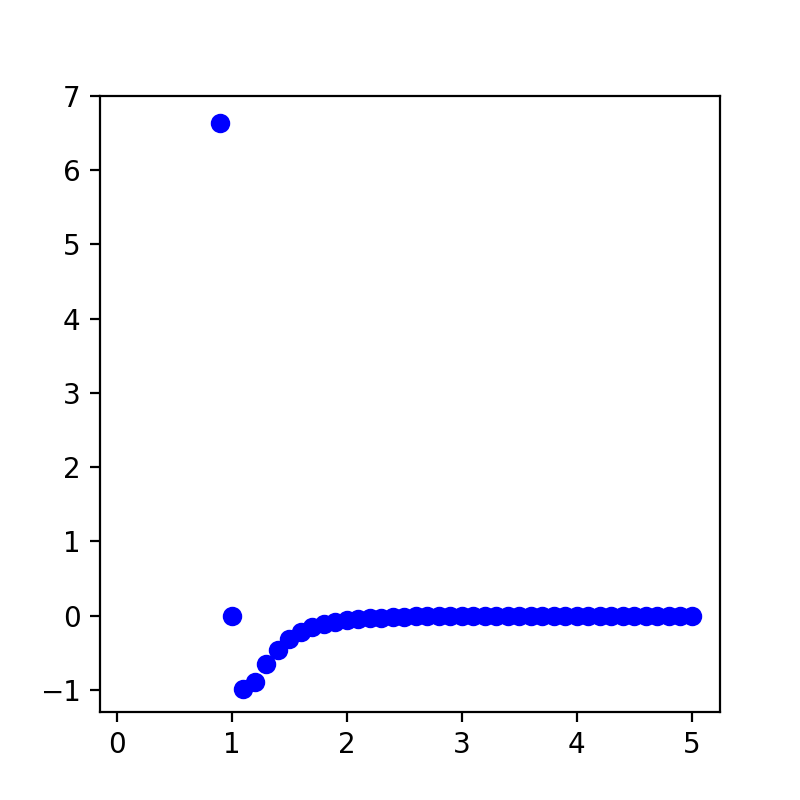

(-1.3, 7.0)

In [9]:
# Create plots
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.set_ylim([-1.3, 7])

In [10]:
def test_part1(coordinates):
    
    # Increment value
    increment_value = 0.1

    for i in range(1, 51):
        r = i * increment_value 
        y = calculate_LJ(r)
        ax.plot(r,y, 'ob')
            
    
test_part1(sample_coords)    

In [11]:
calculate_total_energy(sample_coords)

319600


-3582.239311831134

In [12]:
calculate_total_pair_energy(sample_coords, 4.0)

52102


-3552.7172669906026

### Questions for Problem 1
* A common cutoff distance is 3σ. Do you agree with this choice of cutoff? 
    Yes anything beyong that is a loss of computational power. You can see in the plot the graph plateaus after 3.0
    
* How many pairwise energy calculations do we do not calculate for Configuration 1 without a cut-off of 3σ?
    Without cutoff it is trying to calculate 319600 times with cutoff of 3 sigma it calculates  24838 times so it is not calculating 294,762 pairwise energy calculations

* What about 4σ? 267,498 pairwise energy calculations


In [13]:
def calculate_tail_correction(box_legth, n_particles, cutoff):
    """
    Calculates the tail correction
    
    Parameters
    ----------
    box_legth : float
        The distance between the particles in reduced units.
    n_particles : int
        The number of particles.
    cutoff : float
        The cutoff value.
    """
    pi_term = (8 * math.pi * math.pow(n_particles, 2)) / (3 * math.pow(box_legth, 3))
    r9_term = (1/3) * (math.pow(1/cutoff, 9))
    r3_term = math.pow(1/cutoff, 3)
    
    tail_correction = pi_term * (r9_term - r3_term)
    
    return tail_correction


In [16]:
print(box_length)
print(len(sample_coords))
calculate_tail_correction(box_length, len(sample_coords), 3.0)

10.0
800


-198.4888837441566

In [15]:
def calculate_diff(coordinates, cutoff):
    
    diff = calculate_total_energy(coordinates) - calculate_total_pair_energy(coordinates, cutoff)
    
    return diff

calculate_diff(sample_coords, 3.0)

319600
24838


-94.78507896918018

### Section 2 Questions
* What is the difference in calculated system energy when there is no cut-off vs when using a cut-off of $3\sigma$ ?
    When comparing the two, we get -94.78507896918018, thus there is a difference of 94.78507896918018